# Оперирование таблицами `pandas`


In [31]:
from pathlib import Path
import numpy as np
import pandas as pd


folder = Path("..", "..") / "assets" / "data" / "tables"

## Типы столбцов

Считаем таблицу с планетами и выведем типы данных в её столбце.

In [32]:
planets = pd.read_csv(folder / "planets.csv", index_col="Название")
print(planets.dtypes)
planets

Количество спутников      int64
Масса                   float64
Группа                   object
Кольца                   object
dtype: object


,Количество спутников,Масса,Группа,Кольца
Название,,,,
Меркурий,0,0.0055,земная группа,Нет
Венера,0,0.8150,земная группа,Нет
Земля,1,1.0000,земная группа,Нет
Марс,2,0.1070,земная группа,Нет
Юпитер,62,317.8000,газовый гигант,Да
Сатурн,34,95.2000,газовый гигант,Да
Уран,27,14.3700,ледяной гигант,Да
Нептун,13,17.1500,ледяной гигант,Да


Видим, что типы первых столбцов были корректно выведены из таблицы, а вот последние два столбца можно хранить более эффективно. 

Во-первых, значение столбца "`Кольца`" булевого характера. Чтобы сразу считать их сразу как булевые, в методе [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) можно указать какие значения следует интерпретировать в качестве `True`, а какие в качестве `False`, параметрами `true_values` и `false_values`.

```{tip}
По аналогии с `true_values` и `false_values` ещё есть параметр `na_values`, отвечающий за пропущенные значения.
```

In [33]:
planets = pd.read_csv(folder / "planets.csv", index_col="Название", true_values=["Да"], false_values=["Нет"])
print(planets.dtypes)
planets

Количество спутников      int64
Масса                   float64
Группа                   object
Кольца                     bool
dtype: object


,Количество спутников,Масса,Группа,Кольца
Название,,,,
Меркурий,0,0.0055,земная группа,False
Венера,0,0.8150,земная группа,False
Земля,1,1.0000,земная группа,False
Марс,2,0.1070,земная группа,False
Юпитер,62,317.8000,газовый гигант,True
Сатурн,34,95.2000,газовый гигант,True
Уран,27,14.3700,ледяной гигант,True
Нептун,13,17.1500,ледяной гигант,True


Видим, что значения столбца "`Кольца`" автоматически приняли булевый тип.

Во-вторых, значения столбца "`Группа`" принимают одно из трех значений, а хранятся в столбце типа `object`. Переменные такого характера называют [категориальными](https://ru.wikipedia.org/wiki/%D0%9A%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%B0%D1%8F_%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D0%B0%D1%8F) или номинальными. Для их хранения в `pandas` эффективнее будет воспользоваться специальным категориальным типом данных. 

Для начала продемонстрируем работу метода [pandas.Series.astype](https://pandas.pydata.org/docs/reference/api/pandas.Series.astype.html), который позволяет преобразовать тип данных столбца (или таблицы)

In [34]:
planets["Группа"].astype("category")

Название
Меркурий     земная группа
Венера       земная группа
Земля        земная группа
Марс         земная группа
Юпитер      газовый гигант
Сатурн      газовый гигант
Уран        ледяной гигант
Нептун      ледяной гигант
Name: Группа, dtype: category
Categories (3, object): ['газовый гигант', 'земная группа', 'ледяной гигант']

Видим, что метод преобразовал все к типу `"category"`. Эффективнее, конечно, загрузить таблицу сразу с необходимыми типами данных.

In [35]:
dtypes = {
    "Группа": "category",
    "Количество спутников": np.uint8,
    "Кольца": bool,
    "Масса": "float32"
}

planets = pd.read_csv(
    folder / "planets.csv", 
    index_col="Название", 
    true_values=["Да"], 
    false_values=["Нет"],
    dtype=dtypes
)
print(planets.dtypes)
planets

Количество спутников       uint8
Масса                    float32
Группа                  category
Кольца                      bool
dtype: object


,Количество спутников,Масса,Группа,Кольца
Название,,,,
Меркурий,0,0.005500,земная группа,False
Венера,0,0.815000,земная группа,False
Земля,1,1.000000,земная группа,False
Марс,2,0.107000,земная группа,False
Юпитер,62,317.799988,газовый гигант,True
Сатурн,34,95.199997,газовый гигант,True
Уран,27,14.370000,ледяной гигант,True
Нептун,13,17.150000,ледяной гигант,True


## Названия столбцов

Иногда может потребоваться переименовать столбцы и метки строк в таблице. Переведем названия столбцов и планет, чтобы продемонстрировать принцип работы метода [pd.DataFrame.rename](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html).

In [36]:
columns = {
    "Количество спутников": "number of moons",
    "Масса": "mass",
    "Группа": "group",
    "Кольца": "rings"
}
index = {
    "Меркурий": "Mercury",
    "Венера": "Venus",
    "Земля": "Earth",
    "Марс": "Mars",
    "Юпитер": "jupyter",
    "Сатурн": "Saturn",
    "Уран": "Uranus",
    "Нептун": "Neptune"
} 


planets.rename(
    columns=columns,
    index=index,
    inplace=True
)
planets

,number of moons,mass,group,rings
Название,,,,
Mercury,0,0.005500,земная группа,False
Venus,0,0.815000,земная группа,False
Earth,1,1.000000,земная группа,False
Mars,2,0.107000,земная группа,False
jupyter,62,317.799988,газовый гигант,True
Saturn,34,95.199997,газовый гигант,True
Uranus,27,14.370000,ледяной гигант,True
Neptune,13,17.150000,ледяной гигант,True


Т.е. в большинстве случаев удобнее всего указать новые названия столбцов и/или новые метки индекса в виде словаря. 

```{warning}
Обратите внимание, что по умолчанию метод `rename` не изменяет названия столбцов на месте, а возвращает копию таблицы с переименованными столбцами. Это стандартное поведение для многих методов `pandas`: в последнее время разработчики `pandas` стараются избегать мутирующих методов. Однако если талица очень крупная, то её копирование ради совершения простых операций может оказаться накладным. В таком случае полезным может оказаться метод `inplace`.
```

Переименовать название индекса таблицы можно методом [pandas.Index.rename](https://pandas.pydata.org/docs/reference/api/pandas.Index.rename.html#pandas.Index.rename)

In [37]:
planets.index.rename("name", inplace=True)

## Пропущенные значения

Большинство методов `pandas` разработаны таким образом, чтобы они работали с пропущенными значениями. 

In [38]:
import numpy as np

s1 = pd.Series({"a": 1., "b": 2., "c": np.nan})
s2 = pd.Series({"a": -1,}, dtype=pd.Int32Dtype)
s3 = pd.Series(dtype=pd.Float64Dtype)


df = pd.DataFrame({"s1": s1, "s2": s2, "s3": s3})
df

,s1,s2,s3
a,1.0,-1,NaN
b,2.0,NaN,NaN
c,NaN,NaN,NaN


Например, метод [mean](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) вычисляет среднее каждого столбца с численными значениями.


In [39]:
df.mean()

s1    1.5
s2   -1.0
s3    NaN
dtype: float64

### Отбрасывание пропущенных значений

Тем не менее иногда необходимо избавиться от строк или столбцов с пропущенными данными. Для этого удобно использовать метод [DataFrame.dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html).

#### По строкам 

In [40]:
s1 = pd.Series({"a": 1., "b": 2., "c": np.nan})
s2 = pd.Series({"a": -1, "b": -2}, dtype=pd.Int32Dtype)
s3 = pd.Series({"a": 0})


df = pd.DataFrame({"s1": s1, "s2": s2, "s3": s3})
df

,s1,s2,s3
a,1.0,-1,0.0
b,2.0,-2,NaN
c,NaN,NaN,NaN



По умолчанию метод [DataFrame.dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) отбрасывает все строки, в которых есть хотя бы одно отсутствующее значение. 

In [41]:
df.dropna()

,s1,s2,s3
a,1.0,-1,0.0


Параметром `how` можно указать значение `all`, если необходимо отбросить только те строки, в которых пропущены все значения.

In [42]:
df.dropna(how="all")

,s1,s2,s3
a,1.0,-1,0.0
b,2.0,-2,NaN


#### По столбцам

In [43]:
df = df.T

df

,a,b,c
s1,1.0,2.0,NaN
s2,-1,-2,NaN
s3,0.0,NaN,NaN



Параметром `axis` можно указать, отбрасывать ли строки или столбцы. 

In [44]:
df.dropna(axis="columns")

,a
s1,1.0
s2,-1
s3,0.0


Как и в случае со строками можно отбросить только те столбцы, в которых пропущены все значения, указав значение `all` по параметру `how`.

In [45]:
df.dropna(axis="columns", how="all")

,a,b
s1,1.0,2.0
s2,-1,-2
s3,0.0,NaN


### Заполнение пропущенных значений

Иногда стратегия фильтрации пропущенных значений не является оптимальной, например, в случае когда данных не хватает.  

In [46]:
boolean = pd.Series({"a": True})
numeric = pd.Series({"b": 1})
color_dtype = pd.CategoricalDtype(categories=["black", "white"])
categorical = pd.Series({"c": "white"}, dtype=color_dtype)

categorical

df = pd.DataFrame({
    "boolean": boolean,
    "numeric": numeric,
    "categorical": categorical
})
df

,boolean,numeric,categorical
a,True,NaN,NaN
b,NaN,1.0,NaN
c,NaN,NaN,white


В самом простом случае можно просто заполнить пропущенные значения какими-то константами. Метод [df.fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) можно их заполнить. Самый гибкий способ --- передать заполнители пропущенных значений для каждого столбца в виде словаря.   

In [47]:
df.fillna({
    "boolean": False,
    "numeric": 0,
    "categorical": "black"
})

,boolean,numeric,categorical
a,True,0.0,black
b,False,1.0,black
c,False,0.0,white


Методом [DataFrame.interpolate](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html) можно заполнить пропущенные значения интерполируя по непропущенным.

In [48]:
s = pd.Series({
    1: 1, 2: np.nan,  4: np.nan, 5: 5, 6: np.nan
})

s.interpolate(method="linear")

1    1.000000
2    2.333333
4    3.666667
5    5.000000
6    5.000000
dtype: float64


## apply, map, applymap

Применить некоторую функцию к всем строкам/столбцам таблицы можно методом [DataFrame.apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html). Передавать этому методу необходимо такую функцию, рассчитывая, что ей на вход будет подаваться объект `pd.Series`, который в зависимости от значения параметра `axis` будет или строкой или столбцом таблицы.

In [60]:
mtcars = pd.read_csv(folder / "mtcars.csv", index_col="model")
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


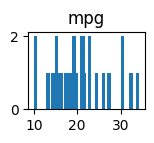

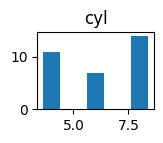

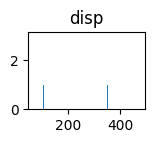

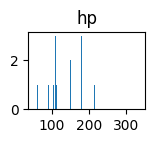

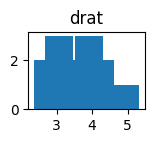

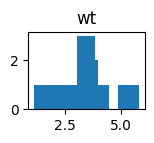

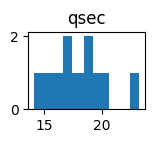

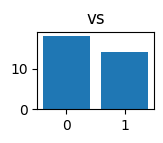

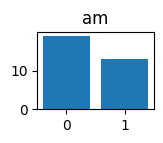

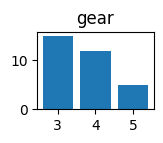

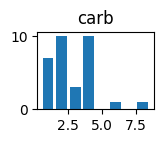

mpg      23.50
cyl       4.00
disp    400.90
hp      283.00
drat      2.17
dtype: float64

In [61]:
from matplotlib import pyplot as plt

def f(x: pd.Series):
    fig, ax = plt.subplots(figsize=(1.5, 1))
    if isinstance(x.dtype, float):
        ax.hist(x)
    else:
        vc = x.value_counts()
        ax.bar(vc.index, vc.array)
    ax.set_title(x.name)
    plt.show(fig)
    return x.max() - x.min()

mtcars.apply(f, axis="rows").head()

Метод [Series.map](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html) позволяет применить функцию к каждому значению столбца. Чтобы продемонстрировать принцип работы этого метода, извлечем из столбца `brand` марку и модель автомобиля в разные столбцы.

Для этого определим функции, которые в качестве аргумента принимают строку из столбца `brand` и возвращают марку или модель автомобиля из неё. В данной таблице, марка автомобиля всегда встречается до первого пробела, а модель автомобиля --- все после первого пробела.

In [51]:
def get_brand(x: pd.Series):
    return x.split(" ")[0]

def get_model(x: pd.Series):
    b, *m = x.split(" ") # все после первого пробела попадает в переменную m
    return " ".join(m)

x = "Mazda RX4 Wag"
print(f"{x} -> {get_brand(x)} and {get_model(x)}")

Mazda RX4 Wag -> Mazda and RX4 Wag


Определив эти функции применим их к столбцу `brand`. Т.к. `brand` --- индекс, то создадим из него `pd.Series`, применим определенные функции методом `map` и запишем результаты в таблицу в качестве новых столбцов.

In [52]:
fullname = pd.Series(mtcars.index, index=mtcars.index)
mtcars.index.rename("car", inplace=True)
mtcars["brand"] = fullname.map(get_brand)
mtcars["model"] = fullname.map(get_model)
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,brand,model
car,,,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda,RX4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda,RX4 Wag
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun,710
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet,4 Drive
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Hornet,Sportabout
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,Valiant,
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,Duster,360
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,Merc,240D
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,Merc,230


Вместо функции, методу `map` можно передать словарь.

In [53]:
translation = {
    "земная группа": "terrestrial group",
    "газовый гигант": "gas giant",
    "ледяной гигант": "ice giant"
    }

planets["group"] = planets["group"].map(translation)
planets

,number of moons,mass,group,rings
name,,,,
Mercury,0,0.005500,terrestrial group,False
Venus,0,0.815000,terrestrial group,False
Earth,1,1.000000,terrestrial group,False
Mars,2,0.107000,terrestrial group,False
jupyter,62,317.799988,gas giant,True
Saturn,34,95.199997,gas giant,True
Uranus,27,14.370000,ice giant,True
Neptune,13,17.150000,ice giant,True


Метод [DataFrame.applymap](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.applymap.html#pandas.DataFrame.applymap) применяет функцию к кажому значению в таблице.

## Группировка по значениям столбца

Часто необходимо сгруппировать строки таблицы по какому-то принципу и с каждой из групп проделать какие-то операции.

```{figure} /_static/lecture_specific/pandas/groupby.svg
```

За группировку в `pandas` отвечает метод [DataFrame.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html). В качестве аргумента ей можно передать имя столбца, по значениям которого необходима группировка (можно также передать несколько столбцов в списке).

In [54]:
from pprint import pprint

grouped = planets.groupby("group")
pprint(dict(grouped.groups))

{'gas giant': Index(['jupyter', 'Saturn'], dtype='object', name='name'),
 'ice giant': Index(['Uranus', 'Neptune'], dtype='object', name='name'),
 'terrestrial group': Index(['Mercury', 'Venus', 'Earth', 'Mars'], dtype='object', name='name')}


Каждую группу можно рассматривать как мини-таблицу.

In [55]:
grouped.get_group("terrestrial group")

,number of moons,mass,group,rings
name,,,,
Mercury,0,0.0055,terrestrial group,False
Venus,0,0.8150,terrestrial group,False
Earth,1,1.0000,terrestrial group,False
Mars,2,0.1070,terrestrial group,False



Часто таблицу группируют по значениям одного столбца, чтобы потом посчитать какие-нибудь агрегирующие функцию к значениям других столбцов. Сделать это можно методом [DataFrameGroupBy.aggregate](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html). 

In [56]:
grouped["number of moons"].aggregate([min, np.mean, np.max, "median", "count"])

,min,mean,amax,median,count
group,,,,,
gas giant,34,48.00,62,48.0,2
terrestrial group,0,0.75,2,0.5,4
ice giant,13,20.00,27,20.0,2


Гораздо чаще в отдельном виде объект группировки не выделяют.

In [57]:
mtcars.groupby("brand")["mpg"].aggregate("count")

brand
AMC         1
Cadillac    1
Camaro      1
Chrysler    1
Datsun      1
Dodge       1
Duster      1
Ferrari     1
Fiat        2
Ford        1
Honda       1
Hornet      2
Lincoln     1
Lotus       1
Maserati    1
Mazda       2
Merc        7
Pontiac     1
Porsche     1
Toyota      2
Valiant     1
Volvo       1
Name: mpg, dtype: int64